In [ ]:
import numpy as np
import pandas as pd 
import hvplot as hv
import hvplot.pandas
import sys, os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

from src.util.model import eval_model, prep_data
seed = 42

In [2]:
dff0 = pd.DataFrame()

data_fp = "../../data/training_data"
for fn in os.listdir(data_fp):
    df = pd.read_csv(os.path.join(data_fp, fn))
    print(f"{fn} {df.shape}")
    if fn.split(".")[0][-1] == "1":
        continue
    else:
        dff0 = pd.concat([dff0, df])
print(dff0.shape)


snow_2020-2025_p160_fxx1.csv (35016, 68)
snow_2020-2025_p160_fxx0.csv (29184, 68)
snow_2020-2025_p159_fxx0.csv (29184, 68)
snow_2020-2025_p159_fxx1.csv (35016, 68)
(58368, 68)


In [3]:
danger_levels = pd.read_csv("../../../data/FAC/FAC_Danger_rating_zone_elv.csv")
danger_levels['date'] = pd.to_datetime(danger_levels['date'])
danger_levels = danger_levels[danger_levels['forecast_zone_id'] == "whitefish"]
danger_levels = danger_levels[danger_levels['lower'] > -1]
danger_levels = danger_levels[['date','lower']]
danger_levels = danger_levels.drop_duplicates()
print(danger_levels.shape)
print(danger_levels.head())

(802, 2)
         date  lower
20 2020-10-19      0
21 2020-10-20      0
22 2020-10-21      0
23 2020-10-22      0
24 2020-10-23      0


In [4]:
X, y = prep_data(
    dff0, 
    danger_levels, 
    "lower", 
    replace_missing=True, 
    change_danger=True, 
    exclude_cols=['date','id','slope_azi', 'danger_level','altitude']) 

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=seed)

In [5]:
from sklearn.utils.class_weight import compute_class_weight

weights = compute_class_weight(class_weight="balanced",classes=danger_levels['lower'].unique(), y=danger_levels['lower'])

weight_dict = {}

for i in range(len(weights)):
    weight_dict[i] = weights[i]
    
print(weight_dict)

{0: np.float64(2.9163636363636365), 1: np.float64(0.8142131979695432), 2: np.float64(3.341666666666667), 3: np.float64(0.3208), 4: np.float64(80.2)}


In [16]:
rf = RandomForestClassifier(random_state=seed, n_estimators=100, max_depth=5)

# rf = RandomForestClassifier(
#         class_weight="balanced",
#         max_depth=50,
#         max_features="log2",
#         min_samples_leaf=6,
#         n_jobs=-1,
#         min_samples_split=12,
#         n_estimators=1000,
#         random_state=42,
#     )

rf.fit(X_train,y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,5
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


Train
Accuracy 0.75
MSE: 0.33868092691622104
RMSE: 0.581962994456023
MAE: 0.2816399286987522
Test
Accuracy 0.61
MSE: 0.5560165975103735
RMSE: 0.7456652047067595
MAE: 0.44813278008298757


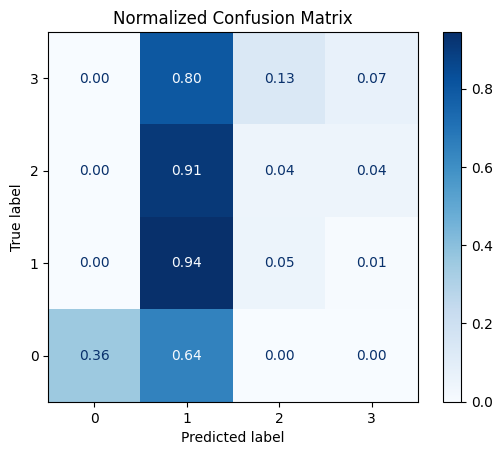

In [17]:
y_pred = rf.predict(X_test)

print("Train")
eval_model(y_train, rf.predict(X_train))

print("Test")
eval_model(y_test, y_pred, plot=True, norm=True)

In [ ]:
feature_importances = pd.DataFrame(rf.feature_importances_,index = X_train.columns, columns=["importance"]).sort_values(by="importance", ascending=False)
print(feature_importances[feature_importances['importance'] > 0])

                      importance
HN72_24                 0.049299
MS_Water                0.041105
ILWR                    0.040783
Sclass2                 0.039501
TA                      0.034003
hoar_size               0.032599
Sd                      0.031321
S5                      0.030320
VW_drift                0.029533
HS_meas                 0.028440
TSG                     0.027398
Qs                      0.026924
zSd                     0.026398
T_bottom                0.025009
Ql                      0.023010
VW                      0.021664
OSWR                    0.021641
TSS_mod                 0.021090
OLWR                    0.020679
HS_mod                  0.020566
mAlbedo                 0.020263
MS_Evap                 0.020078
RH                      0.019936
SWE                     0.018486
ISWR_diff               0.017937
zSn                     0.017546
pAlbedo                 0.016927
HN24                    0.016777
ski_pen                 0.016381
zSs       